In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
%matplotlib inline


In [3]:
tizibika= pd.read_csv('dmz.csv')

In [4]:
tizibika.head()

,2018-02-18 19:34:45,b'So i finally got to meet the genius behind #Tizibika @tozy_b \xf0\x9f\x98\x8d\xf0\x9f\x91\x8f\xf0\x9f\x91\x8f\xf0\x9f\x91\x8f\xf0\x9f\x91\x8f\xf0\x9f\x91\x8f\xf0\x9f\x91\x8f\xf0\x9f\x91\x8c #ZEDKubeka'
0,2018-02-18 15:10:29,"b""RT @queen_dimpled: @tozy_b @Ericmuleproduct ..."
1,2018-02-18 11:50:29,b'RT @mule_mula: when #Tizibika loads on catch...
2,2018-02-18 11:45:03,b'Its official Thursday is my favorite day in ...
3,2018-02-18 11:14:41,"b""I've watched #Tizibika just for 45secs and ..."
4,2018-02-18 11:12:16,b'when #Tizibika loads on catch up its a bliss...


In [6]:
tizibika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
Unnamed: 0    233 non-null int64
likes         233 non-null int64
replies       233 non-null int64
retweets      233 non-null int64
text          233 non-null object
timestamp     233 non-null object
user          233 non-null object
dtypes: int64(4), object(3)
memory usage: 12.8+ KB


In [5]:
tizibika['time_date']=pd.to_datetime(tizibika['timestamp'])

In [6]:
tizibika['date'] = [d.date() for d in tizibika['time_date']]
tizibika['time'] = [d.time() for d in tizibika['time_date']]
tizibika['hour']= tizibika.time_date.dt.hour



In [7]:
tizibika.head()

,Unnamed: 0,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour
0,0,1,2,1,Nanga #DateMyFamilyZambia ?,2018-02-08 18:00:38,maluba96,2018-02-08 18:00:38,2018-02-08,18:00:38,18
1,1,1,1,0,Lelo am watching #DateMyFamilyZambia this fina...,2018-02-08 15:09:16,evey_phiri,2018-02-08 15:09:16,2018-02-08,15:09:16,15
2,2,0,0,1,#DateMyFamilyZambia season finale is on Sunday...,2018-02-08 12:37:01,Media365Zambia,2018-02-08 12:37:01,2018-02-08,12:37:01,12
3,3,3,0,0,Watching my Zambian tv shows feels weird somet...,2018-02-08 6:47:27,Moono16589594,2018-02-08 06:47:27,2018-02-08,06:47:27,6
4,4,1,0,0,Taffy is full of himself please .... morally b...,2018-02-07 16:27:57,sheba_rayabi,2018-02-07 16:27:57,2018-02-07,16:27:57,16


In [8]:
date_tweet_count=tizibika['date'].value_counts()

In [10]:
def convert_index_column(df_tweet_count):
    index_list=np.array(df_tweet_count.index)
    tweets_list=[]
    for index,date_from_index  in enumerate (index_list):
        tweets_counts=df_tweet_count['date'][index]
        tweets_per_day={'date':date_from_index,'number_of_tweets':tweets_counts}
        tweets_list.append(tweets_per_day)
    return tweets_list
        
        

In [11]:
df_tweet_date_count=pd.DataFrame(data=date_tweet_count)
tweets_per_day=convert_index_column(df_tweet_date_count)
tweets_per_day_df=pd.DataFrame(tweets_per_day)
tweets_per_day_df

,date,number_of_tweets
0,2018-02-11,60
1,2018-01-12,60
2,2018-01-06,60
3,2018-02-02,60
4,2018-01-18,60
5,2018-02-12,41
6,2018-01-19,37
7,2018-01-07,35
8,2018-01-25,29
9,2018-01-26,26


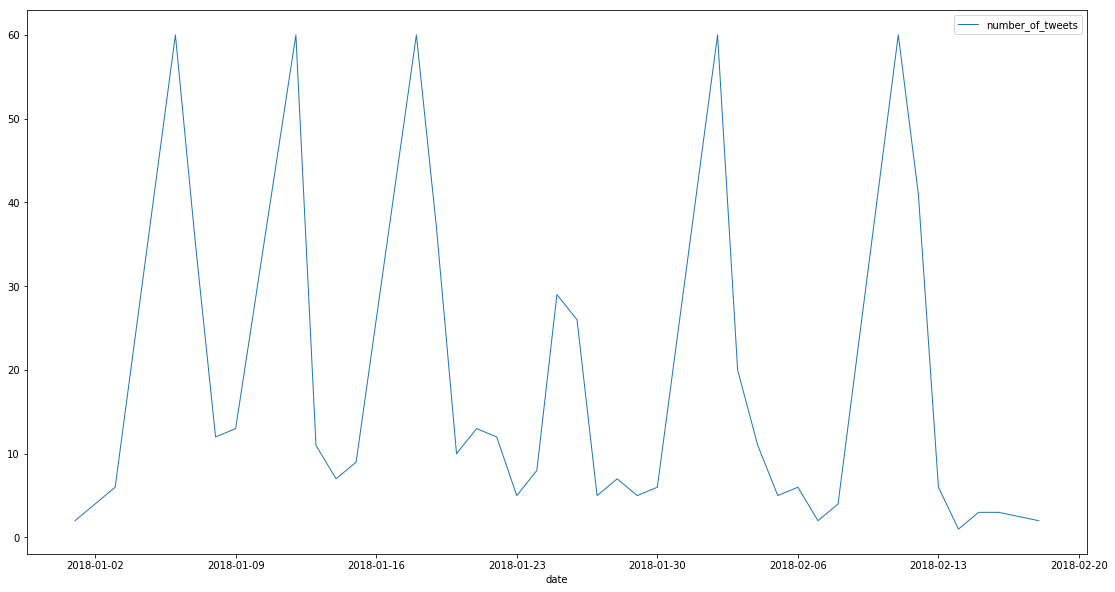

In [34]:
tweets_per_day_df.plot.line(x=tweets_per_day_df['date'],y='number_of_tweets',figsize=(19,10),lw=1)

In [13]:
hour_tweet_count=tizibika['hour'].value_counts()
df_tweet_hour_count=pd.DataFrame(data=hour_tweet_count)

In [14]:
def convert_index_hour(df_tweet_count):
    index_list=np.array(df_tweet_count.index)
    tweets_list=[]
    for index,hour_from_index  in enumerate (index_list):
        tweets_counts=df_tweet_count['hour'][hour_from_index]
        hour=str(hour_from_index)+"hrs"
        tweets_per_hour={'hour':hour,'number_of_tweets':tweets_counts}
        tweets_list.append(tweets_per_hour)
    return tweets_list

In [15]:
tweets_per_hour=convert_index_hour(df_tweet_hour_count)
tweets_per_hour_df=pd.DataFrame(tweets_per_hour)
tweets_per_hour_df

,hour,number_of_tweets
0,19hrs,126
1,20hrs,54
2,9hrs,48
3,8hrs,43
4,13hrs,41
5,14hrs,39
6,12hrs,39
7,10hrs,39
8,15hrs,36
9,16hrs,32


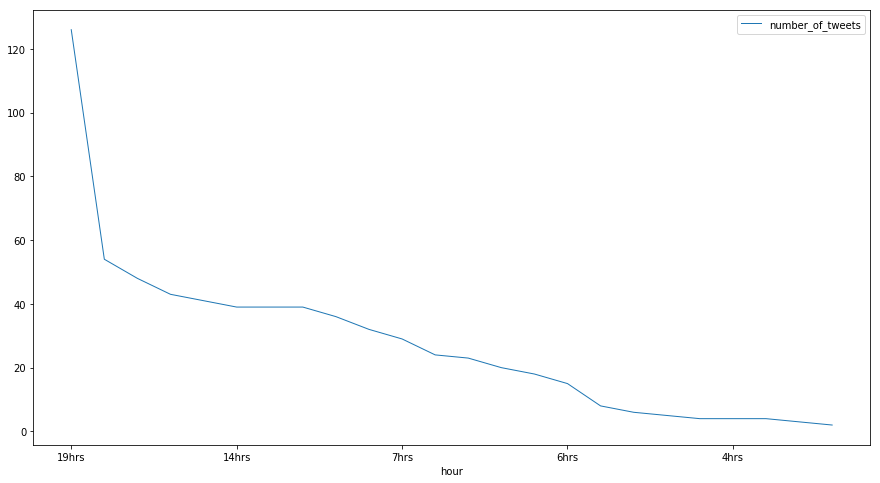

In [16]:
tweets_per_hour_df.plot.line(x='hour',y='number_of_tweets',figsize=(15,8),lw=1)

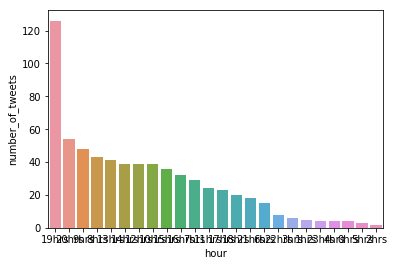

In [17]:
sns.barplot(x='hour',y='number_of_tweets',data=tweets_per_hour_df)

In [18]:
tizibika[tizibika['retweets']==tizibika['retweets'].max()]

,Unnamed: 0,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour
196,196,77,12,48,Too busy for #DateMyFamilyZambia?\nMeet your V...,2018-01-24 13:56:04,TheLatitude15,2018-01-24 13:56:04,2018-01-24,13:56:04,13


In [20]:
highly_retweeted=tizibika[tizibika['retweets']==tizibika['retweets'].max()]

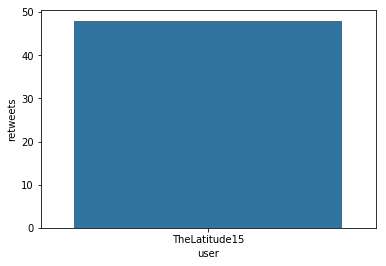

In [21]:
sns.barplot(x='user',y='retweets',data=highly_retweeted)

In [22]:
tizibika[tizibika['likes']==tizibika['likes'].max()]

,Unnamed: 0,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour
24,24,144,8,42,I'm one of the bachelorettes on tomorrow's #Da...,2018-01-03 12:34:04,MissNyambe,2018-01-03 12:34:04,2018-01-03,12:34:04,12


In [23]:
tweep_group=tizibika.groupby('user')
tweep_most_likes=tweep_group['likes'].sum()
tweep_most_likes_df_temp=pd.DataFrame(tweep_most_likes)
tweep_most_likes_df=pd.DataFrame(tweep_most_likes_df_temp['likes'])


In [24]:
def convert_index_most_liked(tweep_most_likes_df):
    index_list=np.array(tweep_most_likes_df.index)
    tweeps=[]
    for index,user_from_index  in enumerate (index_list):
        total_likes=tweep_most_likes_df['likes'][index]
        likes_per_user={'user':user_from_index,'number_of_likes':total_likes}
        tweeps.append(likes_per_user)
    return tweeps
        
        

In [25]:
temp=convert_index_most_liked(tweep_most_likes_df)
most_likes_df=pd.DataFrame(temp)
most_liked_tweets=most_likes_df.sort_values(by='number_of_likes')
most_liked_tweets.tail(5)



,number_of_likes,user
159,57,Nondiie
205,77,TheLatitude15
128,185,MissNyambe
146,203,Naba_Conductor
365,249,zed_blower


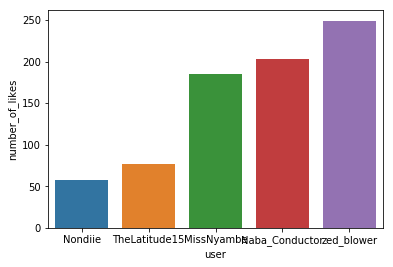

In [26]:
sns.barplot(x='user',y='number_of_likes',data=most_liked_tweets.tail(5))

In [27]:
most_retweeted_tweeps_sum=tizibika.groupby('user')['retweets'].sum()

In [28]:
temp=pd.DataFrame(most_retweeted_tweeps_sum)

In [29]:
def convert_index_most_retweeted(tweep_most_retweeted_df):
    index_list=np.array(tweep_most_likes_df.index)
    tweeps=[]
    for index,user_from_index  in enumerate (index_list):
        total_retweets=tweep_most_retweeted_df['retweets'][index]
        retweets_per_user={'user':user_from_index,'number_of_retweets':total_retweets}
        tweeps.append(retweets_per_user)
    return pd.DataFrame(tweeps)

In [30]:
most_retweeted_tweeps_df=convert_index_most_retweeted(temp)


In [31]:
most_retweeted_tweeps_sorted=most_retweeted_tweeps_df.sort_values(by='number_of_retweets')
most_retweeted_tweeps_sorted.tail(5)

,number_of_retweets,user
360,29,tshikosira
128,44,MissNyambe
205,48,TheLatitude15
146,73,Naba_Conductor
365,84,zed_blower


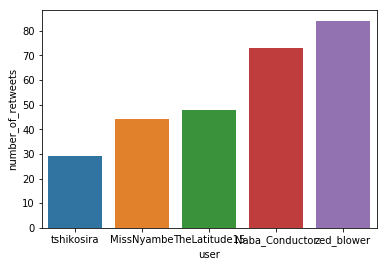

In [32]:
sns.barplot(x='user',y='number_of_retweets',data=most_retweeted_tweeps_sorted.tail(5))

Let begin to find out what words are used to describe Tizibika

In [66]:
import nltk
from nltk.corpus import stopwords
import  string

In [64]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation] 
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [70]:
def count_description(df):
    words=[]
    words.append(text_process(text) for text in df['text'] )
    return  words
  

In [71]:
count_description(tizibika)

[<generator object count_description.<locals>.<genexpr> at 0x7f0d93516af0>]